In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import glob
import seaborn as sn
import pickle

In [3]:
colors_dict = {
    'Wind': 'steelblue',        
    'PV': 'gold',
    'Discharge': 'orangered',    
    'SOC': 'darkgreen',           
    'Charge': 'purple',
    'Consumption': 'green',          
    'Dispatchable': 'crimson',       
    'Curtailment': 'cyan'    
}

In [4]:
# Mise à jour des fichier pickle mais a priori plus besoin maintenant

# data = pd.read_csv('results/optimization_results_world_grid.csv')
# data = data.set_index('Country')
# data = data.drop(['Antarctica'], axis =0)
# for col in data.columns[1:]: 
#     data[f'{col}_normalized']=data[col]/data['mean_load']
    
# for c in data.index.to_list(): 
#     results = pd.read_pickle(f'results/{c}/optimization_results.pickle')
#     results['cf_wind'] = results['E_wind']/data.loc[c, 'P_wind']/8760
#     results['cf_pv'] = results['E_pv']/data.loc[c, 'P_pv']/8760
#     results['capacity_factor_dispatch'] = results['E_dispatch']/data.loc[c, 'P_dispatch']/8760
#     results[ 'share_dispatchable'] = results['E_dispatch']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
#     results[ 'share_wind']=results['E_wind']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
#     results[ 'share_pv']=results['E_pv']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*10
#     folder = f'../input_time_series/{c}/'
#     partie_name_file = f'grid_locations_averaged_wind_{c}_{2021}.xlsx'
#     chemin_pattern = os.path.join(folder, f'*{partie_name_file}*')
#     fichiers_trouves = glob.glob(chemin_pattern)
#     num_loc = fichiers_trouves[0].split('_')[-7]
#     results['num_loc']=num_loc
#     filename = f'results/{c}/optimization_results.pickle'
#     with open(filename, 'wb') as pickle_file:
#             pickle.dump(results, pickle_file)

In [89]:
data = pd.read_csv('results/optimization_results_world_grid.csv')
data = data.set_index('Country')
data = data.drop(['Antarctica'], axis =0)
    
for c in data.index.to_list(): 
    results = pd.read_pickle(f'results/{c}/optimization_results.pickle')
    data.loc[c, 'E_pv'] = results['E_pv']
    data.loc[c, 'E_wind'] = results['E_wind']
    data.loc[c, 'num_loc']=results['num_loc']
    data.loc[c, 'capacity_factor_wind'] = results['cf_wind']
    data.loc[c, 'capacity_factor_pv'] = results['cf_pv']
    data.loc[c, 'capacity_factor_dispatch'] = results['capacity_factor_dispatch']
    data.loc[c, 'share_dispatchable'] = results[ 'share_dispatchable'] 
    data.loc[c, 'share_wind']=results[ 'share_wind']
    data.loc[c, 'share_pv']=results[ 'share_pv']


# for col in data.columns[1:]: 
#     data[f'{col}_normalized']=data[col]/data['mean_load']

In [92]:
data = data.drop_duplicates()

In [93]:
# calculate normalized values to compare countries 
for col in ['E_dispatch',
 'P_dispatch', 'E_pv', 'P_pv',
 'P_wind',
 'E_wind']:
    data[f'{col}_normalized']=data[col]/data['mean_load']
    


In [60]:
def interactive_scatter_plot(data, indic1, indic2, title=None, label1=None, label2=None):
    # Créer le graphique de dispersion interactif
    fig = px.scatter(
        data, x=indic1, y=indic2, hover_name=data.index, 
        labels={indic1: label1, indic2: label2}, 
        title=title
    )

    # Mettre à jour la mise en page
    fig.update_layout(
        hovermode='closest',
        xaxis_title=label1,
        yaxis_title=label2,
        title=title
    )

    # Sauvegarder le graphique en HTML
    fig.write_html(f'{indic1}_{indic2}_interactive_scatter_plot.html')

    # Afficher le graphique dans le navigateur
    fig.show()

# Résultats pour les pays (pas d'états ici)

In [61]:
interactive_scatter_plot(data, 'P_pv_normalized', 'E_pv_normalized', label1='PV capacity normalized by average load', label2='PV energy produced normalized by average load',title = 'Production of PV energy vs installed capacity')
interactive_scatter_plot(data, 'P_wind_normalized', 'E_wind_normalized', label1='Wind capacity normalized by average load', label2='Wind energy produced normalized by average load (hours)',title = 'Production of Wind energy vs installed capacity')

In [65]:
interactive_scatter_plot(data, 'capacity_factor_wind', 'P_wind_normalized', label1='CF Wind', label2='Wind capacity normalized by average load',title = 'Installed capacity vs CF wind ')
interactive_scatter_plot(data, 'capacity_factor_pv', 'P_pv_normalized', label1='CF PV', label2='PV capacity normalized by average load',title = 'Installed capacity vs CF PV ')

In [64]:
interactive_scatter_plot(data, 'capacity_factor_wind', 'E_wind', label1='CF Wind', label2='Wind energy (MWh)',title = 'CF wind vs wind energy (MWh)')
interactive_scatter_plot(data, 'capacity_factor_pv', 'E_pv', label1='CF PV', label2='PV energy (MWh)',title = 'CF PV vs pv energy (MWh)')

# Si on prend en compte les états 

In [94]:
# country_codes = pd.read_csv('../countries_codes_and_coordinates.csv' , sep = ',', index_col = 0)
# data_us = pd.read_csv('results/optimization_results_world_grid_with_states.csv')
# data_us
# data_us = data_us.set_index('State')
    
# for i in range(len(data_us.index.to_list())): 
#     c = data_us.index[i]
#     country_name = data_us.iloc[i,0]
#     results = pd.read_pickle(f'./results/{country_name}/optimization_results_{c}.pickle')
#     iso_code = country_codes.loc[country_name,'Alpha-3 code' ].split(' ')[1]
#     results['cf_wind'] = results['E_wind']/data_us.loc[c, 'P_wind']/8760
#     results['cf_pv'] = results['E_pv']/data_us.loc[c, 'P_pv']/8760
#     results['capacity_factor_dispatch'] = results['E_dispatch']/data_us.loc[c, 'P_dispatch']/8760
#     results[ 'share_dispatchable'] = results['E_dispatch']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
#     results[ 'share_wind']=results['E_wind']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
#     results[ 'share_pv']=results['E_pv']/(results['E_wind']+results['E_pv']+results['E_dispatch'])*100
#     filename = f'results/{country_name}/optimization_results_{c}.pickle'

#     with open(filename, 'wb') as pickle_file:
#             pickle.dump(results, pickle_file)

In [101]:
country_codes = pd.read_csv('../countries_codes_and_coordinates.csv' , sep = ',', index_col = 0)
data_us = pd.read_csv('results/optimization_results_world_grid_with_states.csv')
data_us = data_us.set_index('State')

for i in range(len(data_us.index.to_list())): 
    c = data_us.index[i]
    country_name = data_us.iloc[i,0]
    results = pd.read_pickle(f'./results/{country_name}/optimization_results_{c}.pickle')
    iso_code = country_codes.loc[country_name,'Alpha-3 code' ].split(' ')[1]
    data_us.loc[c, 'E_pv'] = results['E_pv']
    data_us.loc[c, 'E_wind'] = results['E_wind']
    data_us.loc[c, 'capacity_factor_wind'] = results['cf_wind']
    data_us.loc[c, 'capacity_factor_pv'] = results['cf_pv']
    data_us.loc[c, 'capacity_factor_dispatch'] = results['capacity_factor_dispatch']
    data_us.loc[c, 'share_dispatchable'] = results[ 'share_dispatchable'] 
    data_us.loc[c, 'share_wind']=results[ 'share_wind']
    data_us.loc[c, 'share_pv']=results[ 'share_pv']


# for col in data.columns[1:]: 
#     data[f'{col}_normalized']=data[col]/data['mean_load']
    
data_us = data_us.drop_duplicates()

In [102]:
# calculate normalized values to compare countries 
for col in ['E_dispatch',
 'P_dispatch', 'E_pv', 'P_pv',
 'P_wind',
 'E_wind']:
    data_us[f'{col}_normalized']=data_us[col]/data_us['mean_load']
    


In [103]:
data_us

,Country,iso_alpha,mean_load,E_dispatch,P_dispatch,E_destock,P_pv,P_wind,E_pv,E_wind,...,capacity_factor_dispatch,share_dispatchable,share_wind,share_pv,E_dispatch_normalized,P_dispatch_normalized,E_pv_normalized,P_pv_normalized,P_wind_normalized,E_wind_normalized
State,,,,,,,,,,,,,,,,,,,,,
CA,United States,USA,34194.854452,4.825488e+07,48992.507974,9.788962e+07,130332.936143,72748.670940,2.375984e+08,6.194855e+07,...,0.112437,13.874246,17.811451,68.314302,1411.173704,1.432745,6948.366357,3.811478,2.127474,1811.633643
AL,United States,USA,34194.854452,4.892787e+07,56935.291358,8.011241e+07,129929.706300,58177.160455,1.433167e+08,7.078155e+07,...,0.082535,16.126394,27.728877,56.144729,1430.854848,1.665025,4191.177306,3.799686,1.701343,2069.947487
AK,United States,USA,34194.854452,6.491029e+07,49895.279214,3.533449e+07,136590.876692,146077.004619,1.919079e+06,4.196433e+06,...,0.003155,18.401084,55.992761,25.606155,1898.247324,1.459146,56.121858,3.994486,4.271900,122.721190
AZ,United States,USA,34194.854452,5.099935e+07,52283.136364,9.939957e+07,133803.541841,30217.171716,1.240250e+08,2.229949e+07,...,0.058774,15.538048,12.871791,71.590161,1491.433600,1.528977,3627.008001,3.912973,0.883676,652.129967
AR,United States,USA,34194.854452,4.474754e+07,53190.185329,8.373185e+07,130527.735635,46745.370763,1.123587e+08,5.239478e+07,...,0.052581,12.945627,27.684973,59.369400,1308.604543,1.555503,3285.835364,3.817175,1.367029,1532.241556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN043,China,CHN,16812.584475,2.567767e+07,20890.374521,4.302868e+07,82648.415688,24937.579778,1.110561e+08,3.622216e+07,...,0.140315,14.846366,20.943002,64.210632,1527.288547,1.242544,6605.532977,4.915866,1.483269,2154.467023
CN051,China,CHN,23142.097374,3.423075e+07,27157.000000,6.930323e+07,102688.744856,497895.831719,1.705816e+08,3.214316e+07,...,0.143890,14.446066,13.565060,71.988874,1479.155158,1.173489,7371.052465,4.437314,21.514724,1388.947535
CN045,China,CHN,15509.381050,1.894398e+07,17907.024399,4.142310e+07,69978.674370,15712.542932,1.011562e+08,3.470597e+07,...,0.120766,12.237228,22.418988,65.343784,1221.453183,1.154593,6522.259196,4.512022,1.013099,2237.740804


In [104]:
new_data = pd.concat([data, data_us])
new_data = new_data.drop_duplicates()
new_data = new_data.drop(['United States', 'Russia', 'Canada', 'Brazil', 'Australia', 'China'])

In [105]:
new_data

,iso_alpha,mean_load,E_dispatch,P_dispatch,E_destock,P_pv,P_wind,E_pv,E_wind,num_loc,...,share_dispatchable,share_wind,share_pv,E_dispatch_normalized,P_dispatch_normalized,E_pv_normalized,P_pv_normalized,P_wind_normalized,E_wind_normalized,Country
Afghanistan,AFG,810.466324,1.048195e+06,1147.380843,2.398239e+06,2615.638571,1544.225466,5.641621e+06,1.458064e+06,1,...,12.864633,17.895009,6.924036,1293.323149,1.415705,6960.956883,3.227325,1.905354,1799.043117,NaN
Albania,ALB,833.338813,9.463228e+05,935.114592,1.980923e+06,3107.507896,1814.014819,4.758926e+06,2.541122e+06,2,...,11.475628,30.815032,5.770934,1135.579919,1.122130,5710.673837,3.728985,2.176803,3049.326163,NaN
Algeria,DZA,7850.452511,9.212491e+06,11203.084726,4.783740e+06,12433.290247,11260.347368,2.320077e+07,4.556920e+07,2,...,11.813543,58.435190,2.975127,1173.498120,1.427062,2955.341521,1.583767,1.434356,5804.658479,NaN
Angola,AGO,1114.159589,1.776980e+06,1436.186045,3.023659e+06,5198.508940,831.075936,8.453865e+06,1.306173e+06,2,...,15.402423,11.321585,7.327599,1594.906452,1.289031,7587.660428,4.665857,0.745922,1172.339572,NaN
Argentina,ARG,17627.853425,1.375780e+07,21449.263214,1.153815e+07,21066.854165,37723.871678,3.489559e+07,1.195244e+08,4,...,8.180508,71.070268,2.074922,780.457923,1.216782,1979.570956,1.195089,2.140015,6780.429044,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN043,CHN,16812.584475,2.567767e+07,20890.374521,4.302868e+07,82648.415688,24937.579778,1.110561e+08,3.622216e+07,NaN,...,14.846366,20.943002,64.210632,1527.288547,1.242544,6605.532977,4.915866,1.483269,2154.467023,China
CN051,CHN,23142.097374,3.423075e+07,27157.000000,6.930323e+07,102688.744856,497895.831719,1.705816e+08,3.214316e+07,NaN,...,14.446066,13.565060,71.988874,1479.155158,1.173489,7371.052465,4.437314,21.514724,1388.947535,China
CN045,CHN,15509.381050,1.894398e+07,17907.024399,4.142310e+07,69978.674370,15712.542932,1.011562e+08,3.470597e+07,NaN,...,12.237228,22.418988,65.343784,1221.453183,1.154593,6522.259196,4.512022,1.013099,2237.740804,China
CN022,CHN,7572.393950,9.934583e+06,8713.104974,1.701307e+07,29005.738669,8895.026052,4.144615e+07,2.488802e+07,NaN,...,13.025758,32.631995,54.342247,1311.947459,1.150641,5473.322602,3.830458,1.174665,3286.677398,China


In [106]:
interactive_scatter_plot(new_data, 'P_pv_normalized', 'E_pv_normalized', label1='PV capacity normalized by average load', label2='PV energy produced normalized by average load',title = 'Production of PV energy vs installed capacity')
interactive_scatter_plot(new_data, 'P_wind_normalized', 'E_wind_normalized', label1='Wind capacity normalized by average load', label2='Wind energy produced normalized by average load (hours)',title = 'Production of Wind energy vs installed capacity')

In [108]:
interactive_scatter_plot(new_data, 'capacity_factor_wind', 'P_wind_normalized', label1='CF Wind', label2='Wind capacity normalized by average load',title = 'Installed capacity vs CF wind ')
interactive_scatter_plot(new_data, 'capacity_factor_pv', 'P_pv_normalized', label1='CF PV', label2='PV capacity normalized by average load',title = 'Installed capacity vs CF PV ')

# Correlation matrix

In [9]:
data['rate_cf']=data['capacity_factor_wind']/data['capacity_factor_pv']
data['rate_share'] = data['share_wind']/data['share_pv']
data['diff_cf']=data['capacity_factor_wind']-data['capacity_factor_pv']
data['diff_share']=data['share_wind']-data['share_pv']

In [25]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x = data['num_loc'], y=data['share_wind'],mode= 'markers', name='iso_alpha'))
# fig.update_layout(title='% Wind in electric mix vs nb locations', xaxis_title='Number of locations from Renewables ninja', yaxis_title='% Wind')
# fig.show()

<Axes: >

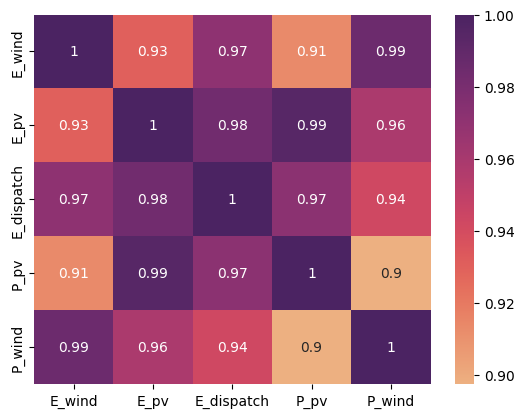

In [26]:
cols = ['E_wind', 'E_pv', 'E_dispatch','P_pv', 'P_wind'] 
corr_matrix = new_data[cols].corr()
sn.heatmap(corr_matrix, annot =True, cmap = 'flare')

<Axes: >

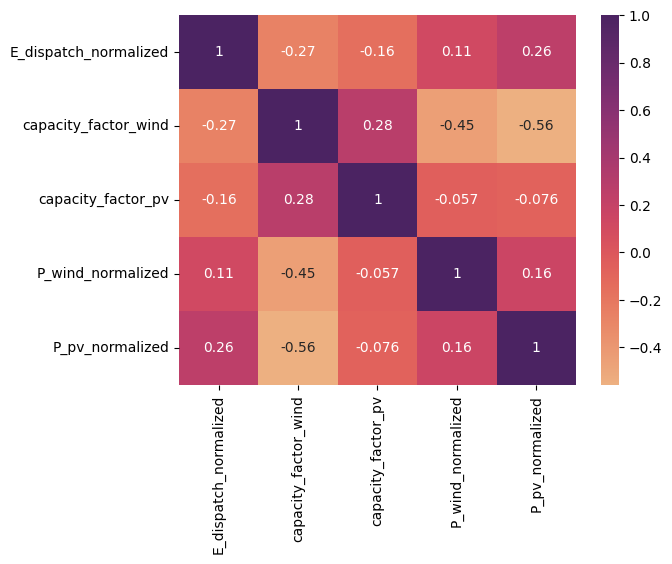

In [27]:
cols = ['E_dispatch_normalized','capacity_factor_wind', 'capacity_factor_pv', 'P_wind_normalized', 'P_pv_normalized'] 
corr_matrix = new_data[cols].corr()
sn.heatmap(corr_matrix, annot =True, cmap = 'flare')

<Axes: >

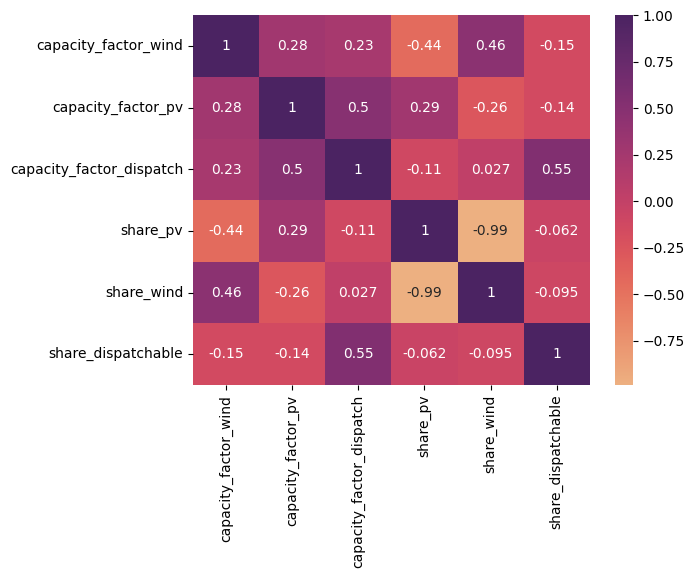

: 

In [28]:
cols = ['capacity_factor_wind', 'capacity_factor_pv', 'capacity_factor_dispatch', 'share_pv', 'share_wind', 'share_dispatchable'] 
corr_matrix = new_data[cols].corr()
sn.heatmap(corr_matrix, annot =True, cmap = 'flare')

# Analyse NEPAL vs COLOMBIE

In [10]:
high_wind = data[data['share_wind']>=80]
high_pv = data[(data['share_pv']>=50) & (data['share_pv']<=60)]
contrasted = data[(data['iso_alpha'] == 'COD') | (data['iso_alpha'] == 'AGO')| (data['iso_alpha'] == 'ZMB') ]
contrasted = data[(data['iso_alpha'] == 'NPL') | (data['iso_alpha'] == 'TJK') ]

In [11]:
contrasted

,iso_alpha,mean_load,E_dispatch,P_dispatch,E_destock,P_pv,P_wind,mean_load_normalized,E_dispatch_normalized,P_dispatch_normalized,E_destock_normalized,P_pv_normalized,P_wind_normalized,capacity_factor_wind,capacity_factor_pv,capacity_factor_dispatch,share_dispatchable,share_wind,share_pv,num_loc
Country,,,,,,,,,,,,,,,,,,,,
Nepal,NPL,600.457991,1.149250e+06,838.0,1.622173e+06,2499.139217,12581.251974,1.0,1913.955091,1.395601,2701.558922,4.162055,20.95276,0.007361,0.203209,0.156555,17.931077,12.657687,69.411236,1
Tajikistan,TJK,1808.218836,3.863145e+06,3319.0,5.043497e+06,6835.088019,28443.173411,1.0,2136.436920,1.835508,2789.207092,3.780012,15.72994,0.009412,0.225385,0.132871,19.606748,11.901642,68.491610,1


In [12]:
ts_to_plot = contrasted

In [13]:
fig = go.Figure()
x = pd.date_range(start='2015-01-01', end= '2015-12-31', freq = 'h')
for c in ts_to_plot.index:
    ts = pd.read_excel(f'../input_time_series/{c}/{c}_demand_Plexos_2015.xlsx', names = ['value'])
    ts = ts/ts.mean()
    fig.add_trace(go.Scatter(x = x, y=ts['value'], mode='lines', name=str(c)))
fig.update_layout(title=f'Demand time serie', xaxis_title='Time', yaxis_title='Power normalized')
fig.show()

In [14]:
fig = go.Figure()
x = pd.date_range(start='2021-01-01', end= '2021-12-31', freq = 'h')
for c in ts_to_plot.index:
    folder = f'../input_time_series/{c}/'
    partie_name_file = f'grid_locations_averaged_wind_{c}_{2021}.xlsx'
    chemin_pattern = os.path.join(folder, f'*{partie_name_file}*')
    fichiers_trouves = glob.glob(chemin_pattern)
    ts = pd.read_excel(fichiers_trouves[0], names = ['value'])
    print(ts.mean())
    fig.add_trace(go.Scatter(x = x, y=ts['value'], mode='lines', name=str(c)))
fig.update_layout(title=f'Wind time serie', xaxis_title='Time', yaxis_title='Capacity factor')
fig.show()

value    0.007361
dtype: float64
value    0.009412
dtype: float64


In [170]:
fig = go.Figure()
x = pd.date_range(start='2021-01-01', end= '2021-12-31', freq = 'h')
for c in ts_to_plot.index:
    folder = f'../input_time_series/{c}/'
    partie_name_file = f'grid_locations_averaged_pv_{c}_{2021}.xlsx'
    chemin_pattern = os.path.join(folder, f'*{partie_name_file}*')
    fichiers_trouves = glob.glob(chemin_pattern)
    ts = pd.read_excel(fichiers_trouves[0], names = ['value'])
    print(ts.mean())
    fig.add_trace(go.Scatter(x = x, y=ts['value'], mode='lines', name=str(c)))
fig.update_layout(title=f'PV time serie', xaxis_title='Time', yaxis_title='Capacity factor')
fig.show()

value    0.203209
dtype: float64
value    0.225385
dtype: float64


# Nuage de point energy vs capacity

In [ ]:
# Nuage de point capacité vs énergie

plt.figure(figsize=(10, 6))
plt.scatter(data['InstalledCapacity'], data['EnergyProduced'], color='blue')

# Ajouter des étiquettes pour chaque point
for i, country in enumerate(data['Country']):
    plt.text(data['InstalledCapacity'][i], data['EnergyProduced'][i], country, fontsize=9)

# Ajouter des titres et des labels
plt.title('Énergie produite vs Capacité installée')
plt.xlabel('Capacité installée (MW)')
plt.ylabel('Énergie produite (GWh)')
plt.grid(True)

# Afficher le graphique
plt.show()